## Import necessary libraries for data handling, visualization, modeling, and evaluation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix

## Load preprocessed training, validation, and test datasets


In [2]:
# Load data
X_train = np.load('./data/X_train.npy')
Y_train = np.load('./data/Y_train.npy')
X_valid = np.load('./data/X_valid.npy')
Y_valid = np.load('./data/Y_valid.npy')
X_test = np.load('./data/X_test.npy')
Y_test = np.load('./data/Y_test.npy')

## Define the Convolutional Neural Network (CNN) architecture
First build a really small model so we can build a baseline model and understand the data and the model better. Small models tend to generalize better. We can also verify that the pipeline works and it makes the debugging easier. This model has 63617 parameters which is considered  small. I chose relu, because of its non-linearity, so the model cna learn more complex features, and its the standard for CNNs. The sigmoid function puts the output to (0, 1), which is perfect for image classification


In [3]:
# Really small model
model = Sequential([
    Conv2D(4, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    Flatten(),
    Dense(1, activation='sigmoid')
])
model.summary()

/Users/gemacsanad/deep2/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 4)    │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 63504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        63,505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,617 (248.50 KB)

 Trainable params: 63,617 (248.50 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the CNN model, set up early stopping, and train the model


In [4]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=5,
                           restore_best_weights=True)

# Train model
history = model.fit(X_train, Y_train,
                    validation_data=(X_valid, Y_valid),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop])

Epoch 1/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 52s 54ms/step - accuracy: 0.8630 - loss: 0.3436 - val_accuracy: 0.9259 - val_loss: 0.2038
Epoch 2/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - accuracy: 0.9173 - loss: 0.2090 - val_accuracy: 0.9306 - val_loss: 0.1864
Epoch 3/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9374 - loss: 0.1704 - val_accuracy: 0.9343 - val_loss: 0.1792
Epoch 4/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.9497 - loss: 0.1397 - val_accuracy: 0.9317 - val_loss: 0.1802
Epoch 5/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.9645 - loss: 0.1060 - val_accuracy: 0.9292 - val_loss: 0.1897
Epoch 6/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - accuracy: 0.9740 - loss: 0.0856 - val_accuracy: 0.9286 - val_loss: 0.1939
Epoch 7/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.9830 - loss: 0.0641 - val_accuracy: 0.9259 - val_loss: 0.2173
Epoch 8/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.9867 - loss: 0

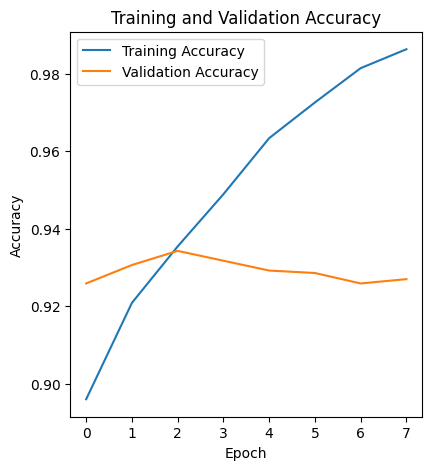

In [5]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


### Show 4-4 misclassified images. 
### 0: No fire
### 1: Fire

197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

Number of misclassified images: 365

Misclassified Images:


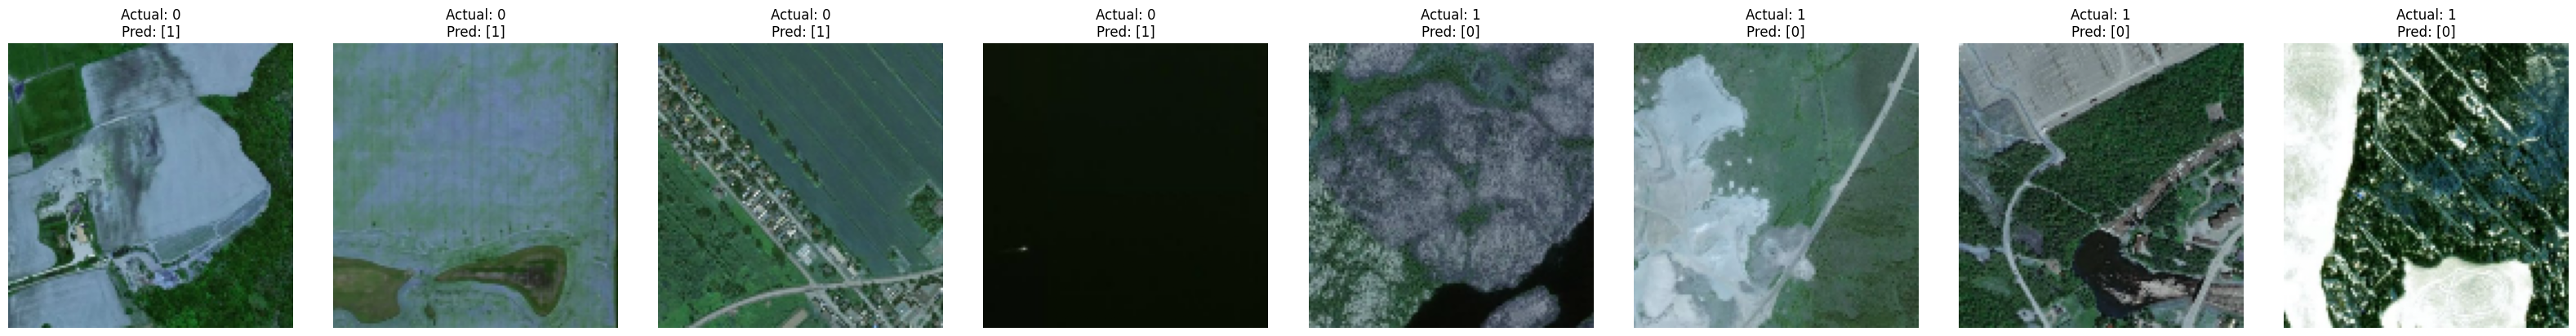

In [6]:
# Predict class labels (0 or 1)
y_pred = (model.predict(X_test) > 0.5).astype(int)

misclassified_indices = np.where(y_pred.flatten() != Y_test)[0]
num_misclassified = len(misclassified_indices)
print(f"\nNumber of misclassified images: {num_misclassified}")

if num_misclassified > 0:
    print("\nMisclassified Images:")

    # Split misclassified by class
    class_0_indices = [idx for idx in misclassified_indices if Y_test[idx] == 0]
    class_1_indices = [idx for idx in misclassified_indices if Y_test[idx] == 1]

    # Select up to 4 from each
    class_0_to_show = class_0_indices[:4]
    class_1_to_show = class_1_indices[:4]

    all_to_show = class_0_to_show + class_1_to_show
    num_to_show = len(all_to_show)

    fig, axes = plt.subplots(1, num_to_show, figsize=(4 * num_to_show, 4))

    # Always make axes iterable
    if num_to_show == 1:
        axes = [axes]

    for i, index in enumerate(all_to_show):
        axes[i].imshow(X_test[index], cmap='gray')
        axes[i].set_title(f"Actual: {Y_test[index]}\nPred: {y_pred[index]}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No misclassified images found.")


### The smaller cant capture the more complex patterns

## Evaluate the model on the test set, show metrics, plot confusion matrix, and save the model


197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9297 - loss: 0.1691
Test Accuracy: 0.94
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.9452    0.9241    0.9346      2820
           1     0.9396    0.9566    0.9480      3480

    accuracy                         0.9421      6300
   macro avg     0.9424    0.9404    0.9413      6300
weighted avg     0.9421    0.9421    0.9420      6300



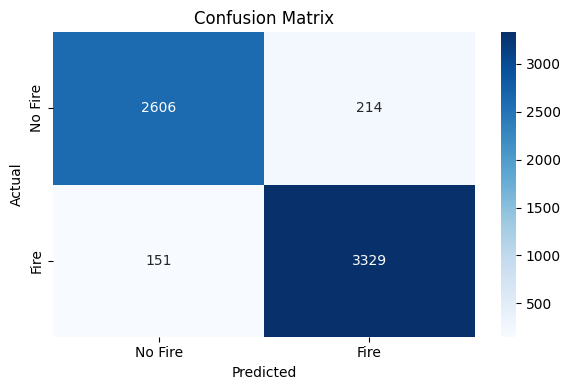

Model saved to ./really_small_model.h5


In [8]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Metrics
print("\nClassification Report:")
print(classification_report(Y_test, y_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

model.save('./really_small_model.h5')
print("Model saved to ./really_small_model.h5")


## Conclusions

* The recall for no wildfire is the lowest: The model has a lot of false negatives
* Too few parameters cannot capture complex data
* The model is really sensitive to noise (light, certain textures)
* Relies too much ono basic patterns
* This small and fast model could be used in real time satellite wildfire detection

## Next steps

* Make a bigger, more robust model